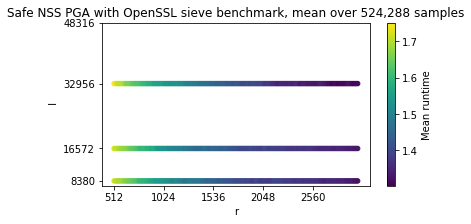

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d

# stock_files = sorted(glob("../data/nss_benchmark/nss_sieve/combined.csv"))
# df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)
df = pd.read_csv("../data/nss_benchmark/openssl_sieve/safefinal_combined_tmp.csv")

# df_opt = pd.read_csv("../data/openssl_benchmark/native_implementation/safe_combined.csv")
# opt_mean = df_opt[" avgruntime"].mean(axis=0)

#create vec with truth vars if some condition met
df = df.loc[df[' l'] <= 40000]

df = df.groupby(['r', ' l']).agg(["mean", "max", "min"]).reset_index() #for final 64x runs
#df.columns = df.columns.str.strip()


minmax = [df[(" avgruntime", "mean")].to_numpy() - df[(" avgruntime", "min")].to_numpy(), df[(" avgruntime", "max")].to_numpy() - df[(" avgruntime", "mean")].to_numpy()]
#2d
# fig = df.plot(x='r', y=(" avgruntime", "mean"), marker=".", yerr=minmax, color="black", linewidth=1, capsize=3, legend=None, figsize=(8,8), label="Sampled mean with min and max deviation from 8,192 sample batch")
# fig.set_title("Safe OpenSSL PGA with Dirichlet sieve benchmark, mean over 131,072 samples")
# fig.set_ylabel("Runtime [s]")
# fig.set_xlabel("r: Number of primes")
# xticks = np.arange(8, 56+1, 8)
# fig.set_xticks(xticks)
# fig.set_xticklabels(xticks, rotation=45)
# #fig.plot(128, 1.5, color='red', marker=".", label='Native Safe OpenSSL implementation')
# #fig.plot(128, opt_mean, color='green', marker=".", label='Optimized with single pointer allocation')
# fig.legend(loc=2)

#3d
# df = df.sort_values(' l')
# df[' l'] = df[' l'].astype(str)
fig = df.plot.scatter(x='r', y=' l', c=(" avgruntime", "mean"), colormap="viridis", sharex=False, figsize=(6,3))
fig.set_title("Safe NSS PGA with OpenSSL sieve benchmark, mean over 524,288 samples")
xticks = np.arange(512, 3024+1, 512)
fig.set_xticks(xticks)

yticks = [8380, 16572, 32956]
fig.set_yticks(yticks)

f = plt.gcf()
cax = f.get_axes()[1] #get colormap instance
cax.set_ylabel("Mean runtime")

fig.figure.savefig("../plots/final_safe_nss_ossl.jpg", bbox_inches = "tight", dpi=300) 